In [16]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from tqdm.notebook import tqdm
import numpy as np
import math
from itertools import chain
from scipy.stats import norm

In [17]:
#Here I define the function, which adds the monomer to a polymer (=makes a step of RW).
#The inputs are array of coordinates (coord) and array of lengths of a chain (i)
#It returns the updated values of coord and i
def step(coord):
    val = np.random.rand( ) #random variable, which says in which direction to go (+x or -x)
    v = round(3*val)%3
    last = len(coord)-1
    
    #step along the x axis
    if v == 1:
        dx = 2
    else:
        dx = -1
        
    f = coord[last] + dx #coordinate, which is suppose to be new
    coord.append(f) 

    return coord

In [18]:
def step_st(coord):
    val = np.random.rand( ) #random variable, which says in which direction to go (+x or -x)
    v = round(val)
    last = len(coord)-1
    
    dx = (-1)**v #step along the x axis        
    f = coord[last] + dx #coordinate, which is suppose to be new
    coord.append(f) 

    return coord

In [19]:
#Here I define the function, which performs a random walk.
#The inputs are initial coordinates of a RW (init_coord) and number of steps n.
#It returns 4 arrays: 
    #array of powers nu
    #array of numberss of steps N
    #array of end-to-end distances R
    #array of coordinates coord, which is path of the RW
def rw(n, init_coord):
    R_s=[]
    R=[]

    coord = [init_coord]
    coord_s = [init_coord]
    for i in range (n):
        coord = step (coord)
        coord_s = step_st (coord_s)
    fin_coord = coord[len(coord)-1]
    fin_coord_s = coord_s[len(coord)-1]
        
    #Notice!: N and R are in logarithmic scale for the handy fittingКы.append(len(coord))
    R.append(fin_coord-init_coord)
    R_s.append(fin_coord_s-init_coord)
            
    return R, R_s

In [40]:
#n = [5, 25, 100, 200] #list of numbers of monomers to explore
runs = 9000
itr = 1500
init_coord = 0 

In [41]:
R = [ ]
R_s = [ ]
for i in tqdm( range (itr) ):
    Rm, R_sm = rw(runs, init_coord)
    R = R + Rm
    R_s = R_s + R_sm


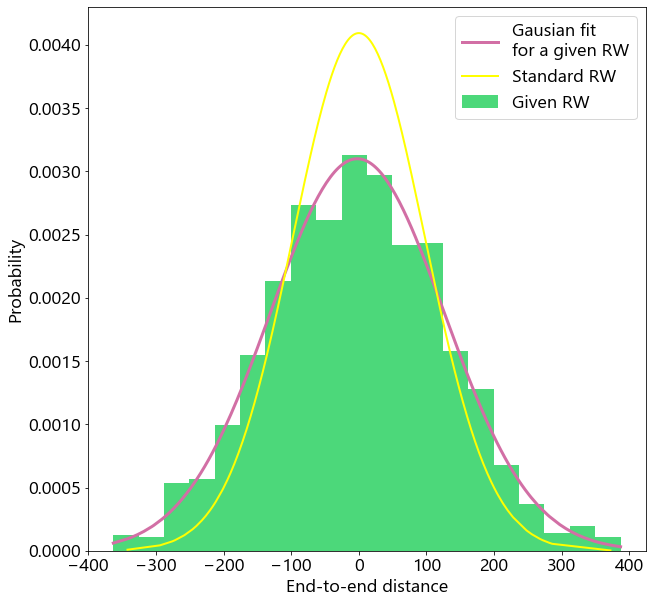

In [42]:
font = {'family' : 'Segoe UI',
        'weight' : 'normal',
        'size'   : 18}
matplotlib.rc('font', **font)
R = np.sort(R)
(mu, sigma) = norm.fit(R)
p = norm.pdf(R, mu, sigma)

R_s = np.sort(R_s)
(mu_s, sigma_s) = norm.fit(R_s)
p_s = norm.pdf(R_s, mu_s, sigma_s)

plt.figure(figsize=(10,10))
plt.hist(R, bins=20, color='#4cd87a', density='True', label = 'Given RW')
plt.plot(R, p, linewidth=3, color='#d26fa5', label = 'Gausian fit\nfor a given RW')
plt.plot(R_s, p_s, linewidth=2, color='yellow', label = 'Standard RW')
plt.legend(loc='upper right')
plt.ylabel('Probability')
plt.xlabel('End-to-end distance')
plt.show()

In [45]:
print("1st moment:\t1st moment_standard:\n",mu,'\t', round(mu_s,2))

1st moment:	1st moment_standard:
 -2.248 	 0.02


In [46]:
print("2nd moment:\t2nd moment_standard:\n", round(sigma**2+mu**2,2),'\t',round(sigma_s**2+mu_s**2,2))

2nd moment:	2nd moment_standard:
 16568.23 	 9498.66
